<a href="https://colab.research.google.com/github/Rakesh010/newsweb/blob/master/covid1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Apr 17 22:19:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip "/content/drive/MyDrive/X_Ray_Data1.zip"

Archive:  /content/drive/MyDrive/X_Ray_Data1.zip
   creating: X_Ray_Data1/
   creating: X_Ray_Data1/COVID/
  inflating: X_Ray_Data1/COVID/COVID-1.png  
  inflating: X_Ray_Data1/COVID/COVID-10.png  
  inflating: X_Ray_Data1/COVID/COVID-100.png  
  inflating: X_Ray_Data1/COVID/COVID-1000.png  
  inflating: X_Ray_Data1/COVID/COVID-1001.png  
  inflating: X_Ray_Data1/COVID/COVID-1002.png  
  inflating: X_Ray_Data1/COVID/COVID-1003.png  
  inflating: X_Ray_Data1/COVID/COVID-1004.png  
  inflating: X_Ray_Data1/COVID/COVID-1005.png  
  inflating: X_Ray_Data1/COVID/COVID-1006.png  
  inflating: X_Ray_Data1/COVID/COVID-1007.png  
  inflating: X_Ray_Data1/COVID/COVID-1008.png  
  inflating: X_Ray_Data1/COVID/COVID-1009.png  
  inflating: X_Ray_Data1/COVID/COVID-101.png  
  inflating: X_Ray_Data1/COVID/COVID-1010.png  
  inflating: X_Ray_Data1/COVID/COVID-1011.png  
  inflating: X_Ray_Data1/COVID/COVID-1012.png  
  inflating: X_Ray_Data1/COVID/COVID-1013.png  
  inflating: X_Ray_Data1/COVID/COVID

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as im
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras import models,layers
import os

In [6]:
main_folder = 'X_Ray_Data1'
names = os.listdir(main_folder)
names

['COVID', 'Normal']

In [7]:
x = [] # to store images
y = [] # to store lables

In [8]:
for folder in names:
  file_names = os.listdir(main_folder+"/"+folder)
  for img_name in file_names:
    path = main_folder+"/"+folder+"/"+img_name
    img = im.load_img(path,target_size=(250,250))
    img = im.img_to_array(img)
    x.append(img)
    y.append(names.index(folder))

In [9]:
x = np.array(x)
y = np.array(y)

In [10]:
y = to_categorical(y)
print(x.shape)
print(y.shape)

(2665, 250, 250, 3)
(2665, 2)


In [11]:
layer1 = layers.Input(shape=(250,250,3))
layer2 = layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu')(layer1)
layer3 = layers.MaxPooling2D(pool_size=(2,2))(layer2)
layer4 = layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu')(layer3)
layer4 = layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu')(layer4)
layer5 = layers.MaxPooling2D(pool_size=(2,2))(layer4)
layerk = layers.Dropout(0.2)(layer5)
layer6 = layers.Flatten()(layerk)
layer7 = layers.Dense(200,activation='relu')(layer6)
layer8 = layers.Dense(2,activation='softmax')(layer7)
model = models.Model(inputs=layer1,outputs=layer8)

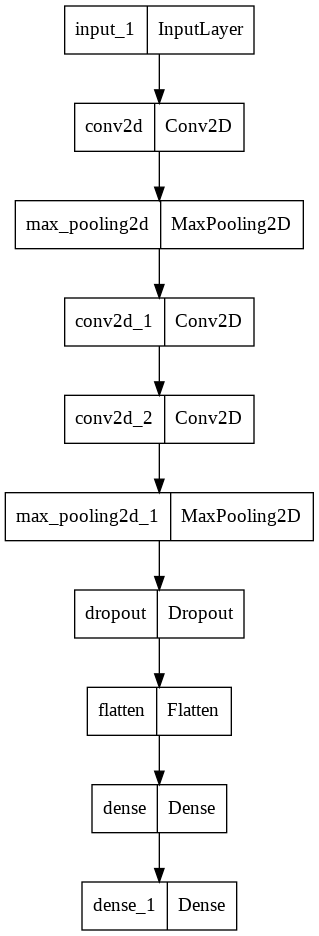

In [12]:
plot_model(model)

In [13]:
model.compile( loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

In [16]:
#train the model
model.fit(xtrain,ytrain,epochs=20,batch_size=32,validation_data=(xtest,ytest))

Epoch 1/20
67/67 [==============================] - 14s 60ms/step - loss: 50.1137 - accuracy: 0.8354 - val_loss: 0.4962 - val_accuracy: 0.9212
Epoch 2/20
67/67 [==============================] - 3s 44ms/step - loss: 0.1593 - accuracy: 0.9629 - val_loss: 0.3324 - val_accuracy: 0.9400
Epoch 3/20
67/67 [==============================] - 3s 44ms/step - loss: 0.0793 - accuracy: 0.9855 - val_loss: 0.3808 - val_accuracy: 0.9343
Epoch 4/20
67/67 [==============================] - 3s 44ms/step - loss: 0.0211 - accuracy: 0.9939 - val_loss: 0.1857 - val_accuracy: 0.9700
Epoch 5/20
67/67 [==============================] - 3s 44ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.1893 - val_accuracy: 0.9606
Epoch 6/20
67/67 [==============================] - 3s 44ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.1943 - val_accuracy: 0.9644
Epoch 7/20
67/67 [==============================] - 3s 45ms/step - loss: 5.3147e-04 - accuracy: 1.0000 - val_loss: 0.1918 - val_accuracy: 0.9625
Epoch 8

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 16)      1168      
                                                                 
 conv2d_2 (Conv2D)           (None, 120, 120, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                         

In [18]:
ypred = model.predict(xtest)
ypred2 = np.array([np.argmax(k) for k in ypred])
ypred2

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,

In [19]:
ytest2 = np.array([np.argmax(k) for k in ytest])

In [20]:
from sklearn import metrics
cm = metrics.confusion_matrix(ytest2,ypred2)

In [23]:
import pandas as pd
pd.DataFrame(cm,index=names,columns=names)

,COVID,Normal
COVID,266,6
Normal,11,250


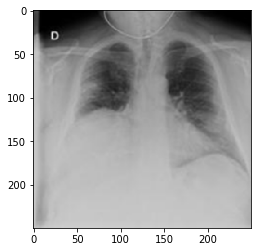

In [24]:
img = xtest[0]
plt.imshow(img.astype('int32'))

In [25]:
model.predict(img.reshape(1,250,250,3))

array([[1.0000000e+00, 1.3463579e-08]], dtype=float32)

In [26]:
names

['COVID', 'Normal']